# **Problem Statement:**
##Regression on wine quality Data set, with features: 
####fixed acidity;volatile acidity;citric acid;residual sugar;chlorides;free sulfur dioxide;total sulfur dioxide;density;pH;sulphates;alcohol;
####Class Label: "quality"

---


In [0]:
#! pip install pandas-profiling==2.6.0

#Required Packages

In [0]:
import pandas as pd #For Reading and manipulating Data
#import turicreate as tc
import seaborn as sc #For Visualizing data
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.linear_model import LinearRegression #Importing Linear Regression model from sci-kit learn package

In [0]:
#This cell is used to mount drive into colab.
#from google.colab import drive 
#drive.mount('/content/drive') 

#Reading Datasets

In [0]:
redWineData = pd.read_csv('/content/drive/My Drive/Quisite(intern)/drive-download/Projects_Quesite/Quesite_Group-1 winequality/winequality-red.csv')

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
whiteWineData = pd.read_csv('/content/drive/My Drive/Quisite(intern)/drive-download/Projects_Quesite/Quesite_Group-1 winequality/winequality-white.csv', sep=';')

In [33]:
redWineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [34]:
whiteWineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


We have two datasets, one foe Red wine and other is for White wine. So, we perforn outer merge of those datasets in-order to get a single dataset out of them without any redundancy. 

In [35]:
redWineData.shape

(1599, 12)

In [36]:
whiteWineData.shape

(4898, 12)

In [37]:
redWineData.columns == whiteWineData.columns #To check if both the datasets have same features or not.

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [0]:
cols = whiteWineData.columns

In [0]:
cols = list(cols)

##Merging two datasets into one dataset using outer merge

In [0]:
WineData = pd.merge(redWineData, whiteWineData, on=cols, how='outer')

In [41]:
WineData

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6490,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6491,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6492,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6493,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


#Understanding Data

In [42]:
WineData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6495 entries, 0 to 6494
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6495 non-null   float64
 1   volatile acidity      6495 non-null   float64
 2   citric acid           6495 non-null   float64
 3   residual sugar        6495 non-null   float64
 4   chlorides             6495 non-null   float64
 5   free sulfur dioxide   6495 non-null   float64
 6   total sulfur dioxide  6495 non-null   float64
 7   density               6495 non-null   float64
 8   pH                    6495 non-null   float64
 9   sulphates             6495 non-null   float64
 10  alcohol               6495 non-null   float64
 11  quality               6495 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.6 KB


In [43]:
WineData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6495.000000,6495.000000,6495.000000,6495.00000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000
mean,7.215589,0.339698,0.318656,5.44428,0.056042,30.520400,115.744034,0.994697,3.218479,0.531304,10.491768,5.818322
std,1.296515,0.164650,0.145333,4.75816,0.035034,17.748962,56.529715,0.002999,0.160806,0.148814,1.192738,0.873208
min,3.800000,0.080000,0.000000,0.60000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.80000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.00000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.10000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.80000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


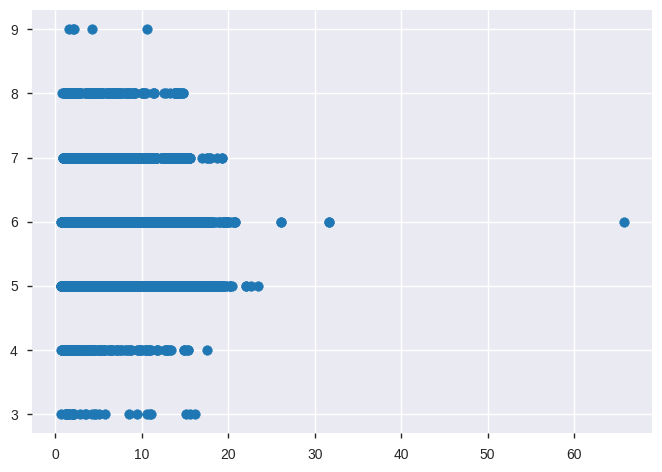

In [44]:
plt.scatter(WineData['residual sugar'], WineData['quality']
            )

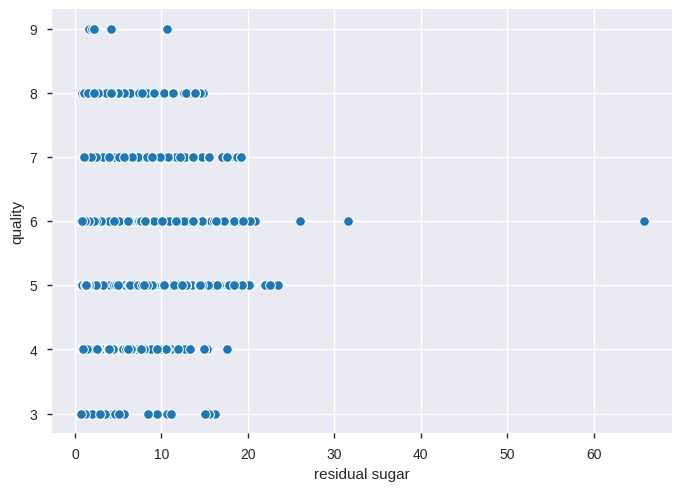

In [45]:
sc.scatterplot(WineData['residual sugar'], WineData['quality'])

In [0]:
import pandas_profiling as pp

In [0]:
#pp.ProfileReport(WineData)

In [0]:
required_features = ['alcohol', 'density', 'chlorides', 'volatile acidity']

In [49]:
#sc.pairplot(WineData)

Output hidden; open in https://colab.research.google.com to view.

In [50]:
WineData.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.218880,0.324348,-0.112162,0.298134,-0.282560,-0.329053,0.458873,-0.252618,0.299471,-0.095541,-0.076830
volatile acidity,0.218880,1.000000,-0.378147,-0.196187,0.377087,-0.352420,-0.414481,0.271222,0.261586,0.225884,-0.037708,-0.265830
citric acid,0.324348,-0.378147,1.000000,0.142353,0.038917,0.133340,0.195282,0.096069,-0.329753,0.056096,-0.010550,0.085501
residual sugar,-0.112162,-0.196187,0.142353,1.000000,-0.129129,0.403186,0.495542,0.552461,-0.267249,-0.186128,-0.359492,-0.036971
chlorides,0.298134,0.377087,0.038917,-0.129129,1.000000,-0.194973,-0.279708,0.362435,0.044796,0.395470,-0.256827,-0.200517
free sulfur dioxide,-0.282560,-0.352420,0.133340,0.403186,-0.194973,1.000000,0.721009,0.025888,-0.146042,-0.188323,-0.179751,0.055636
total sulfur dioxide,-0.329053,-0.414481,0.195282,0.495542,-0.279708,0.721009,1.000000,0.032365,-0.238447,-0.275767,-0.265692,-0.041288
density,0.458873,0.271222,0.096069,0.552461,0.362435,0.025888,0.032365,1.000000,0.011784,0.259306,-0.686787,-0.305749
pH,-0.252618,0.261586,-0.329753,-0.267249,0.044796,-0.146042,-0.238447,0.011784,1.000000,0.192247,0.121309,0.019548
sulphates,0.299471,0.225884,0.056096,-0.186128,0.395470,-0.188323,-0.275767,0.259306,0.192247,1.000000,-0.002960,0.038607


In [0]:
#pp.ProfileReport(redWineData)

In [0]:
#pp.ProfileReport(whiteWineData)

In [53]:
pd.unique(whiteWineData['alcohol'])

array([ 8.8       ,  9.5       , 10.1       ,  9.9       ,  9.6       ,
       11.        , 12.        ,  9.7       , 10.8       , 12.4       ,
       11.4       , 12.8       , 11.3       , 10.5       ,  9.3       ,
       10.        , 10.4       , 11.6       , 12.3       , 10.2       ,
        9.        , 11.2       ,  8.6       ,  9.4       ,  9.8       ,
       11.7       , 10.9       ,  9.1       ,  8.9       , 10.3       ,
       12.6       , 10.7       , 12.7       , 10.6       ,  9.2       ,
        8.7       , 11.5       , 11.8       , 12.1       , 11.1       ,
        8.5       , 12.5       , 11.9       , 12.2       , 12.9       ,
       13.9       , 14.        , 13.5       , 13.3       , 13.2       ,
       13.7       , 13.4       , 13.        ,  8.        , 13.1       ,
       13.6       ,  8.4       , 14.2       , 11.94      , 12.89333333,
       11.46666667, 10.98      , 10.03333333, 11.43333333, 10.53333333,
        9.53333333, 10.93333333, 11.36666667, 11.33333333, 11.06

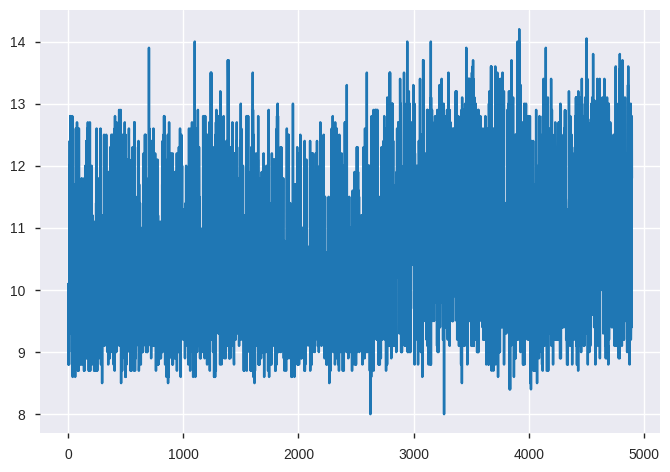

In [54]:
whiteWineData['alcohol'].plot()

In [0]:
from sklearn.model_selection import train_test_split

In [56]:
WineData.quality

0       5
1       5
2       5
3       5
4       6
       ..
6490    6
6491    5
6492    6
6493    7
6494    6
Name: quality, Length: 6495, dtype: int64

In [0]:
x = WineData.drop('quality', axis=1) 

In [0]:
y = WineData.quality

In [59]:
x.count()

fixed acidity           6495
volatile acidity        6495
citric acid             6495
residual sugar          6495
chlorides               6495
free sulfur dioxide     6495
total sulfur dioxide    6495
density                 6495
pH                      6495
sulphates               6495
alcohol                 6495
dtype: int64

In [60]:
y.count()

6495

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify = y)

In [62]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3358,6.9,0.29,0.23,8.6,0.056,56.0,215.0,0.99670,3.17,0.44,8.8
3632,6.5,0.25,0.20,1.4,0.024,29.0,101.0,0.99160,3.24,0.54,10.8
2529,6.1,0.36,0.58,15.0,0.044,42.0,115.0,0.99780,3.15,0.51,9.0
2108,5.9,0.62,0.28,3.5,0.039,55.0,152.0,0.99070,3.44,0.44,12.0
3714,5.7,0.33,0.15,1.9,0.050,20.0,93.0,0.99340,3.38,0.62,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4788,7.0,0.17,0.36,6.4,0.055,42.0,123.0,0.99318,3.11,0.50,11.0
1440,7.2,0.37,0.32,2.0,0.062,15.0,28.0,0.99470,3.23,0.73,11.3
5580,6.3,0.22,0.27,4.5,0.036,81.0,157.0,0.99280,3.05,0.76,10.7
3183,6.4,0.25,0.74,7.8,0.045,52.0,209.0,0.99560,3.21,0.42,9.2


In [0]:
from sklearn import preprocessing

In [0]:
scaling_data = preprocessing.StandardScaler().fit(X_train)

In [0]:
X_train_scaled = scaling_data.transform(X_train)

In [0]:
X_test_scaled = scaling_data.transform(X_test)

In [67]:
X_test_scaled

array([[-1.10281904e+00, -2.42718243e-01, -1.35281178e+00, ...,
         9.97431942e-01,  3.89441828e-01,  1.39865111e-02],
       [-1.18062123e+00, -3.63018142e-01,  2.88216995e-01, ...,
         3.12726977e-01,  3.04733115e+00,  1.19130052e+00],
       [-3.24797177e-01,  1.08058064e+00,  1.47121998e-02, ...,
         3.12726977e-01, -2.23917247e-01, -7.42858206e-01],
       ...,
       [-7.91610297e-01, -3.63018142e-01, -6.69049789e-01, ...,
         1.37090738e+00,  7.30196869e-01, -5.74670491e-01],
       [ 2.97620316e-01, -2.11844510e-03,  4.93345592e-01, ...,
        -6.83207517e-01, -1.94642218e-02, -1.07923364e+00],
       [-4.80401550e-01,  5.80315043e-02,  2.19840796e-01, ...,
        -7.45453423e-01, -4.28370271e-01, -9.11045921e-01]])

In [106]:
X_test.shape

(1299, 11)

In [105]:
X_train.shape

(5196, 11)

In [0]:
from sklearn.linear_model import LinearRegression

In [69]:
model1 = LinearRegression()
model1.fit(X_train_scaled,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
model1.coef_

array([ 0.09708807, -0.21616407, -0.0228907 ,  0.22425569, -0.01541878,
        0.10962981, -0.14379326, -0.19513553,  0.07921016,  0.10928903,
        0.30140897])

In [71]:
model1.intercept_

5.8179368745188595

In [72]:
model1.score(X_test_scaled, Y_test)

0.30000763208494663

In [73]:
model1.score(X_train_scaled,Y_train)

0.28967230245988795

In [0]:
predicted_y = model1.predict(X_test_scaled)

In [0]:
from sklearn.metrics import mean_absolute_error

In [76]:
mean_absolute_error(predicted_y, Y_test)

0.569012296148903

In [77]:
predicted_y

array([5.94461095, 6.74418443, 5.41822591, ..., 5.74889563, 5.28702132,
       5.27123222])

In [78]:
Y_test

4129    6
5836    7
1836    6
3441    6
2700    6
       ..
2450    5
37      7
1892    7
3622    6
4222    6
Name: quality, Length: 1299, dtype: int64

In [0]:
#WineData.drop(labels = )

In [0]:
not_required_labels = ['pH', 'residual sugar', 'total sulfur dioxide', 'quality']
x2 = WineData.drop(labels=not_required_labels, axis=1)

In [82]:
x2

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,density,sulphates,alcohol
0,7.4,0.70,0.00,0.076,11.0,0.99780,0.56,9.4
1,7.4,0.70,0.00,0.076,11.0,0.99780,0.56,9.4
2,7.8,0.88,0.00,0.098,25.0,0.99680,0.68,9.8
3,7.8,0.76,0.04,0.092,15.0,0.99700,0.65,9.8
4,11.2,0.28,0.56,0.075,17.0,0.99800,0.58,9.8
...,...,...,...,...,...,...,...,...
6490,6.2,0.21,0.29,0.039,24.0,0.99114,0.50,11.2
6491,6.6,0.32,0.36,0.047,57.0,0.99490,0.46,9.6
6492,6.5,0.24,0.19,0.041,30.0,0.99254,0.46,9.4
6493,5.5,0.29,0.30,0.022,20.0,0.98869,0.38,12.8


In [0]:
y2 = WineData.quality

In [0]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=42, stratify = y)

In [0]:
model2 = LinearRegression()

In [86]:
model2.fit(X_train2, Y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
model2.coef_

array([-7.60511367e-03, -1.45140551e+00, -2.51097502e-01, -7.70072868e-01,
        3.26782103e-03,  2.98862112e+01,  5.59690377e-01,  3.69551045e-01])

In [88]:
model2.intercept_

-27.510732391175832

In [89]:
model2.score(X_test2, Y_test2)

0.292252398730096

In [0]:
predicted_y2 = model2.predict(X_test2)

In [91]:
mean_absolute_error(Y_test2, predicted_y2)

0.5736284680503461

In [92]:
WineData.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [93]:
WineData.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.218880,0.324348,-0.112162,0.298134,-0.282560,-0.329053,0.458873,-0.252618,0.299471,-0.095541,-0.076830
volatile acidity,0.218880,1.000000,-0.378147,-0.196187,0.377087,-0.352420,-0.414481,0.271222,0.261586,0.225884,-0.037708,-0.265830
citric acid,0.324348,-0.378147,1.000000,0.142353,0.038917,0.133340,0.195282,0.096069,-0.329753,0.056096,-0.010550,0.085501
residual sugar,-0.112162,-0.196187,0.142353,1.000000,-0.129129,0.403186,0.495542,0.552461,-0.267249,-0.186128,-0.359492,-0.036971
chlorides,0.298134,0.377087,0.038917,-0.129129,1.000000,-0.194973,-0.279708,0.362435,0.044796,0.395470,-0.256827,-0.200517
free sulfur dioxide,-0.282560,-0.352420,0.133340,0.403186,-0.194973,1.000000,0.721009,0.025888,-0.146042,-0.188323,-0.179751,0.055636
total sulfur dioxide,-0.329053,-0.414481,0.195282,0.495542,-0.279708,0.721009,1.000000,0.032365,-0.238447,-0.275767,-0.265692,-0.041288
density,0.458873,0.271222,0.096069,0.552461,0.362435,0.025888,0.032365,1.000000,0.011784,0.259306,-0.686787,-0.305749
pH,-0.252618,0.261586,-0.329753,-0.267249,0.044796,-0.146042,-0.238447,0.011784,1.000000,0.192247,0.121309,0.019548
sulphates,0.299471,0.225884,0.056096,-0.186128,0.395470,-0.188323,-0.275767,0.259306,0.192247,1.000000,-0.002960,0.038607


In [0]:
not_required_labels.extend(['sulphates', 'free sulfur dioxide'])

In [95]:
not_required_labels

['pH',
 'residual sugar',
 'total sulfur dioxide',
 'quality',
 'sulphates',
 'free sulfur dioxide']

In [0]:
x3 = WineData.drop(labels=not_required_labels, axis=1)

In [97]:
y

0       5
1       5
2       5
3       5
4       6
       ..
6490    6
6491    5
6492    6
6493    7
6494    6
Name: quality, Length: 6495, dtype: int64

In [0]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(x3, y, test_size=0.2, random_state=42, stratify = y)

In [0]:
model3 = LinearRegression()

In [100]:
model3.fit(X_train3, Y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
model3.score(X_test3, Y_test3)

0.28012708093306493

In [0]:
predicted_y3 = model3.predict(X_test3)

In [103]:
mean_absolute_error(Y_test3, predicted_y3)

0.5797663229361013